<center>
<h3>Análisis y visualización de datos</h3>
</center>

### Exploración de datos del Sistema Nacional de Estadísticas sobre Ejecución de la Pena – SNEEP
##### En este conjunto de datos se detalla información recopilada en el censo realizado sobre el total de la población detenida al día 31 de diciembre de cada año, en cada establecimiento de la República Argentina. La unidad de análisis son las personas alojadas en dichos establecimientos https://datos.gob.ar/dataset/justicia-sistema-nacional-estadisticas-sobre-ejecucion-pena---sneep
##### Para este analisis se tiene en cuenta el año 2016 y 2015.

In [1]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#import corrplot
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [2]:
sneep = pd.read_csv('sneep2015_2016.csv',
                          encoding='utf8')

In [3]:
sneep[:3]

,anio_censo,provincia_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,sexo_id,sexo_descripcion,nacionalidad_id,nacionalidad_descripcion,estado_civil_id,estado_civil_descripcion,nivel_instruccion_id,nivel_instruccion_descripcion,ultima_situacion_laboral_id,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_id,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_id,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_id,ultima_provincia_residencia_descripcion,jurisdiccion_id,jurisdiccion_descripcion,situacion_legal_id,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_id,establecimiento_procedencia_descripcion,delito1_id,delito1_descripcion,delito2_id,delito2_descripcion,delito3_id,delito3_descripcion,delito4_id,delito4_descripcion,delito5_id,delito5_descripcion,horas_trabajo_remunerado_id,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_id,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_id,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_id,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_id,sancion_aplicada_descripcion,calificacion_conducta_id,calificacion_conducta_descripcion,tentativa_fugas_evasiones_id,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_id,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,tiene_medidas_seguridad,es_reincidente_id,es_reincidente_descripcion,tiene_periodo_progresividad_id,tiene_periodo_progresividad_descripcion,reparticion_id,reparticion_descripcion,tuvo_salidas_transitorias_id,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_id,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
0,2016,3,Córdoba,27,COMPLEJO CARCELARIO Nº 1 MODULO M.D.1,19,1,Masculino,1,Argentina,1,Soltero,3,Primario completo,0.0,NaN,0.0,NaN,2.0,Urbano,3,Córdoba,3,PROVINCIAL - Córdoba,2,Procesado,NaN,NaN,1.0,Ingreso directo,0.0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,5,No tiene trabajo remunerado,0.0,5.0,Si - educación no formal (Cursos),1.0,19.0,SI - OTRAS ENFERMEDADES,1.0,4.0,SI - Alteración del orden SIN heridos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,3,Córdoba,27,COMPLEJO CARCELARIO Nº 1 MODULO M.D.1,21,1,Masculino,1,Argentina,1,Soltero,3,Primario completo,0.0,NaN,0.0,NaN,2.0,Urbano,3,Córdoba,3,PROVINCIAL - Córdoba,2,Procesado,2015-08-20,NaN,1.0,Ingreso directo,0.0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,5,No tiene trabajo remunerado,0.0,6.0,No participa de ningún programa educativo,0.0,19.0,SI - OTRAS ENFERMEDADES,1.0,4.0,SI - Alteración del orden SIN heridos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,3,Córdoba,27,COMPLEJO CARCELARIO Nº 1 MODULO M.D.1,22,1,Masculino,1,Argentina,1,Soltero,3,Primario completo,0.0,NaN,0.0,NaN,2.0,Urbano,3,Córdoba,3,PROVINCIAL - Córdoba,2,Procesado,2016-03-05,NaN,1.0,Ingreso directo,0.0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,5,No tiene trabajo remunerado,0.0,5.0,Si - educación no formal (Cursos),0.0,19.0,SI - OTRAS ENFERMEDADES,1.0,4.0,SI - Alteración del orden SIN heridos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sneep.shape

(30314, 85)

## Estadísticas descriptivas
### Cálculos estadísticos de la edad de la población 
* Con los datos tomados de los años 2015 y 2016 se hara primero un analisis por edad para ver si existe una tendencia en los datos.

In [5]:
print('La Media en la edad de la población es: {:.0f}'.format(sneep.edad.mean()))
print('La Mediana en la edad de la población es: {:.0f}'.format(sneep.edad.median()))
print("La Moda en la edad de la población es: %d" % sneep.edad.mode())
print('La Desviación en la edad de la población es: {:.0f}'.format(sneep.edad.std()))

La Media en la edad de la población es: 33
La Mediana en la edad de la población es: 30
La Moda en la edad de la población es: 26
La Desviación en la edad de la población es: 11


* Si vemos la distribución de los datos en un gráfico de barra se observa que el estadistico efectivo es la Moda (24) ya que vemos que nuestra distrubucion en lo datos es una distribución normal y que el pico de la campana corresponde a la Moda. 

Text(0.5,1,'Distribución de Frecuencias por Edad')

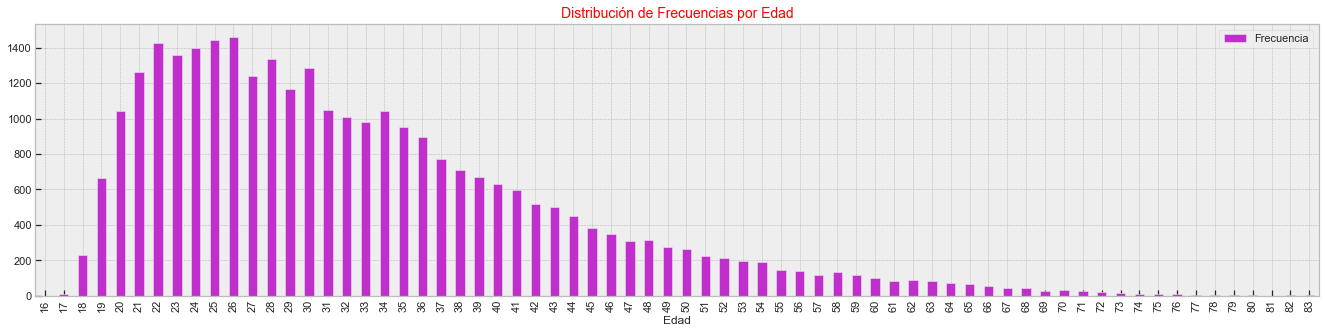

In [6]:
datos= sneep.edad.value_counts()
lista_evento = datos.sort_index()
df_Edad = pd.DataFrame({
   'Edad' : lista_evento.index.values,
   'Frecuencia' : lista_evento.get_values(),
}) 
_ = df_Edad.plot( x='Edad',y='Frecuencia',kind='bar', figsize = (23,5), color='#c02ecc')
plt.title('Distribución de Frecuencias por Edad', fontsize=14, color='red')

### Cálculos estadísticos de la duración de la condena  
* Con los datos tomados de los años 2015 y 2016 se hara un analisis por duración de la condena para ver si existe una tendencia en los datos.

In [7]:
print('La Media en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.mean()))
print('La Mediana en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.median()))
print("La Moda en los años de condena es: %d" % sneep.duracion_condena_anios.mode())
print('La Desviación en los años de condena es: {:.0f}'.format(sneep.duracion_condena_anios.std()))

La Media en los años de condena es: 4
La Mediana en los años de condena es: 0
La Moda en los años de condena es: 0
La Desviación en los años de condena es: 6


* Analizando con los calculos estadísticos y el gráfico de distrubuciones, la cantidad de años de condena tiende a menos de un año. Si excluyeramos los condenados de menos de un año la distribución en los datos responde a una distribución normal.  

Text(0.5,1,'Distribución de Frecuencias por Años de Condena')

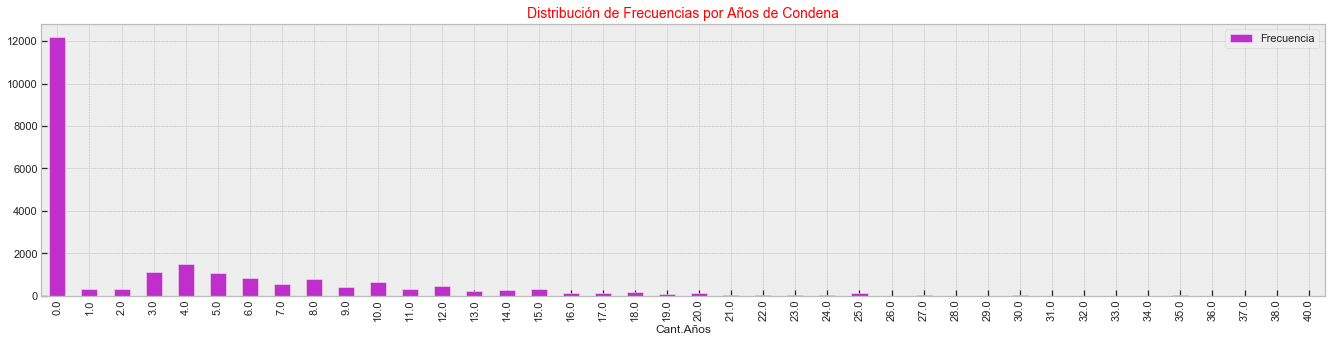

In [8]:
datos_condena= sneep.duracion_condena_anios.value_counts()
lista_evento_1 = datos_condena.sort_index()
df_Condena = pd.DataFrame({
   'Cant.Años' : lista_evento_1.index.values,
   'Frecuencia' : lista_evento_1.get_values(),
}) 
_ = df_Condena.plot( x='Cant.Años',y='Frecuencia',kind='bar', figsize = (23,5), color='#c02ecc')
plt.title('Distribución de Frecuencias por Años de Condena', fontsize=14, color='red')

* Si buscamos la Funcion de Densidad de Probabilidades (FPD) nos encontramos con una distribución de los datos muy similar a la que representamos con el gráfico de barras. 

Text(0.5,1,'Probability density function of normal distribution')

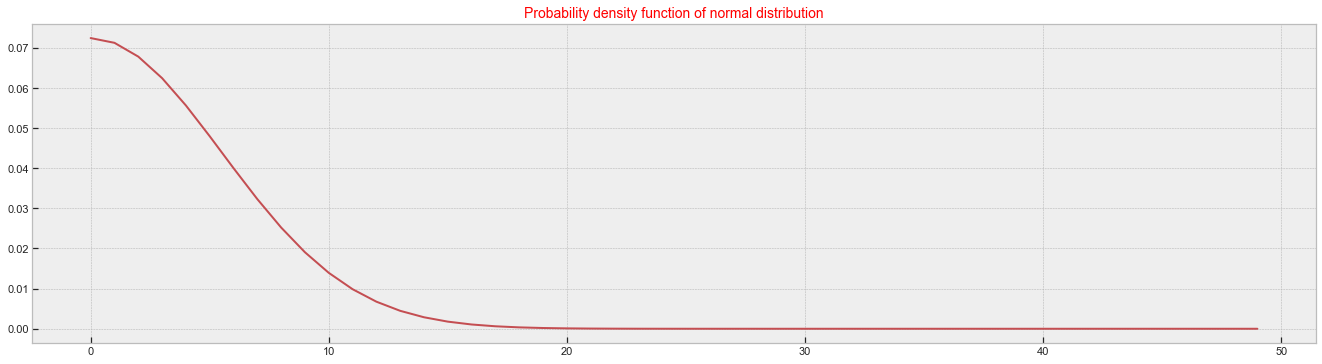

In [9]:
mu = sneep.duracion_condena_anios.median()
sigma=sneep.duracion_condena_anios.std()
rng = range(0,50)
dist = norm(mu, sigma)

plt.figure(figsize = (23,20))
plt.subplot(311) 
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('Probability density function of normal distribution', fontsize=14, color='red')

### Análisis de la variable edad por genero de la población

In [10]:
nuevo_dt= sneep[ ~sneep['edad'].isnull()& ~sneep['sexo_descripcion'].isnull()  & ~sneep['duracion_condena_anios'].isnull()]
Frecuencia_edad= sneep.edad.value_counts()
df_nvo_dt = pd.DataFrame({
   'Edad' : nuevo_dt.edad,
   'Sexo' : nuevo_dt.sexo_descripcion,
   'AñosdeCondena' : nuevo_dt.duracion_condena_anios,
}) 

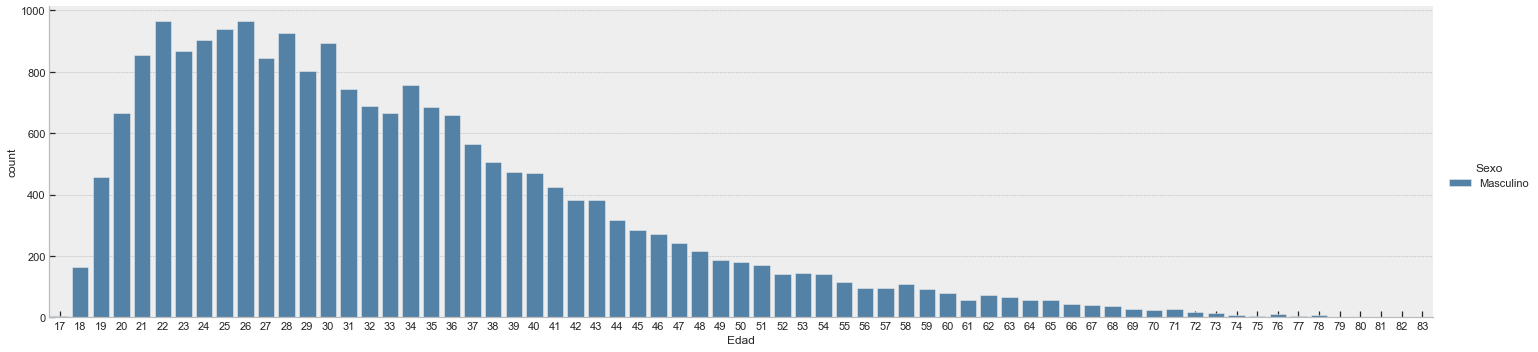

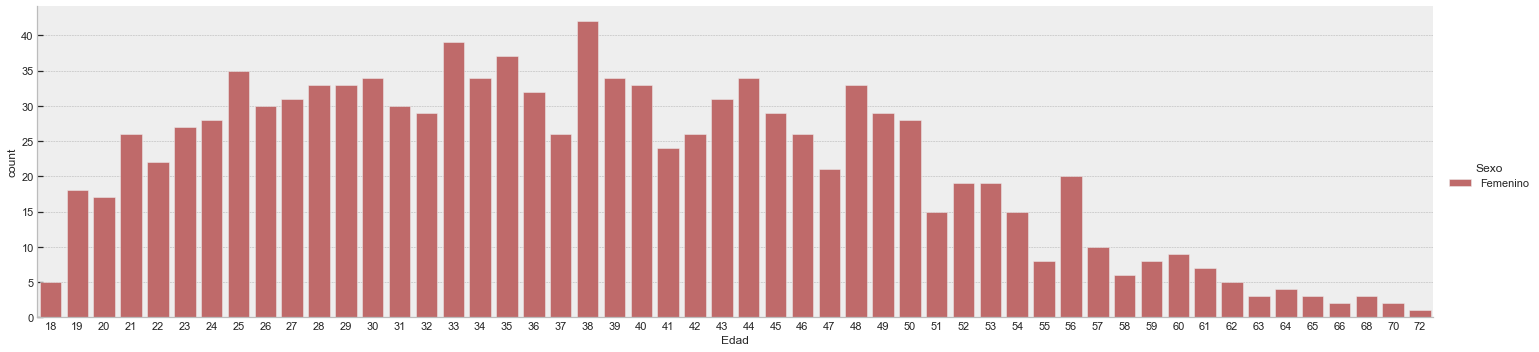

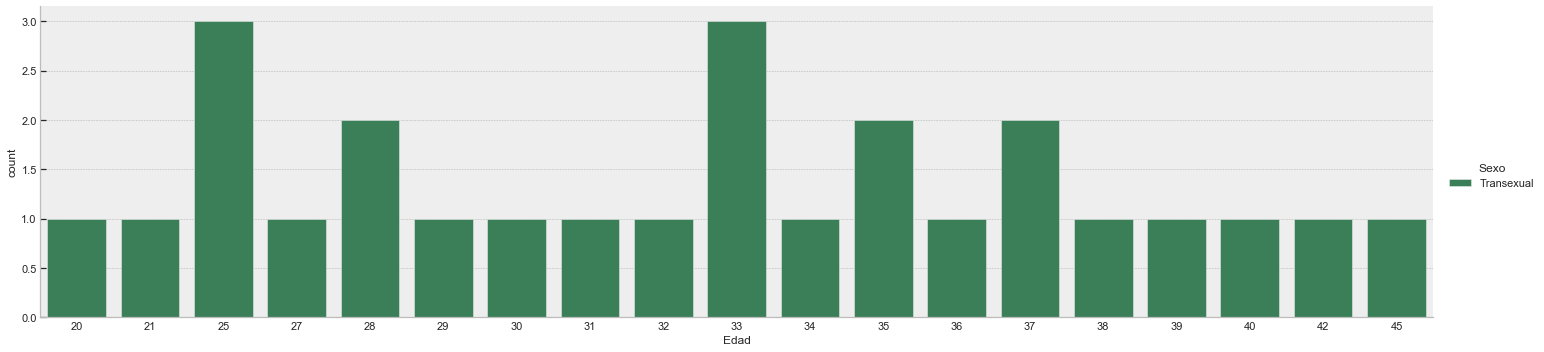

In [11]:
pal = dict(Masculino="#4682B4", Femenino="#CD5C5C",Transexual="#2E8B57")
gr_1 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_2 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'],kind="count", aspect=4, palette=pal, legend_out=True)

gr_3 = sns.factorplot(x="Edad",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'],kind="count", aspect=4, palette=pal, legend_out=True)


* De este análisis (edad por sexo) podemos decir que la población Masculina es quien predomina en los datos, y la que hace que los datos tengan una distribución normal, al igual que el sexo femenino.
* Haciendo el calculo de media, mediana, moda y desviación en cuanto a la edad por sexo nos da lo siguiente:

In [12]:
media = [df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.mean(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.mean(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.mean()]
mediana=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.median(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.median(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.median()]
mode=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.mode().values[0], df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.mode().values[0],df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.mode().values[0]]
std=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].Edad.std(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].Edad.std(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].Edad.std()]
d = {'Media': media,'Mediana': mediana,'Moda': mode,'Desviacion estandar': std }
df = pd.DataFrame(data=d, index=['Masculino','Femenino','Transexual'])
df

,Media,Mediana,Moda,Desviacion estandar
Masculino,33.305777,31.0,22,10.954527
Femenino,37.868161,37.0,38,11.276500
Transexual,32.230769,33.0,25,6.294809


#### Podemos concluir que predomina el genero masculino en la población, y cuando vemos por edad tanto para el genero masculino como femenino no existe gran diferencia, como si se nota en el genero transexual. Hay una distribucion normal en los datos que se observan del sexo masculino y femenino.

### Análisis de la variable años de condenas por genero de la población

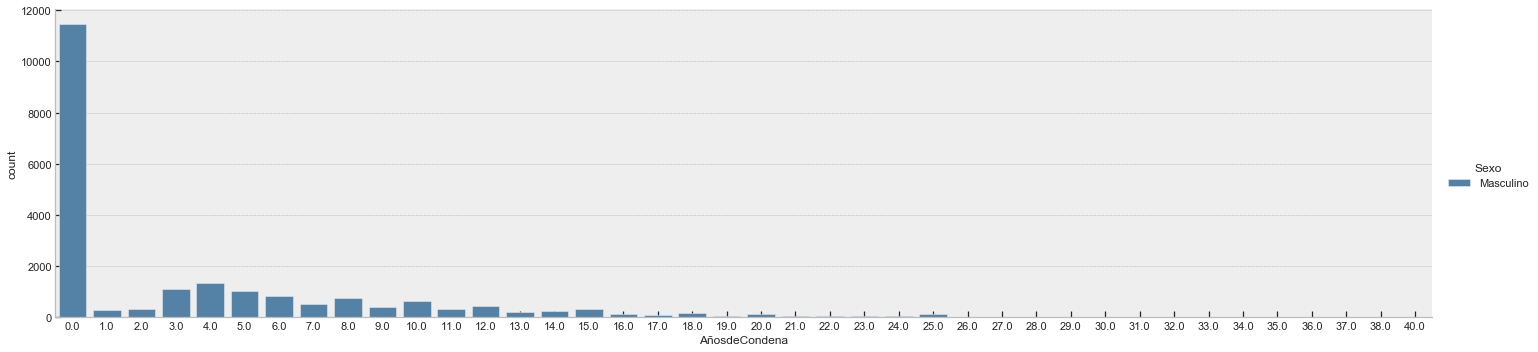

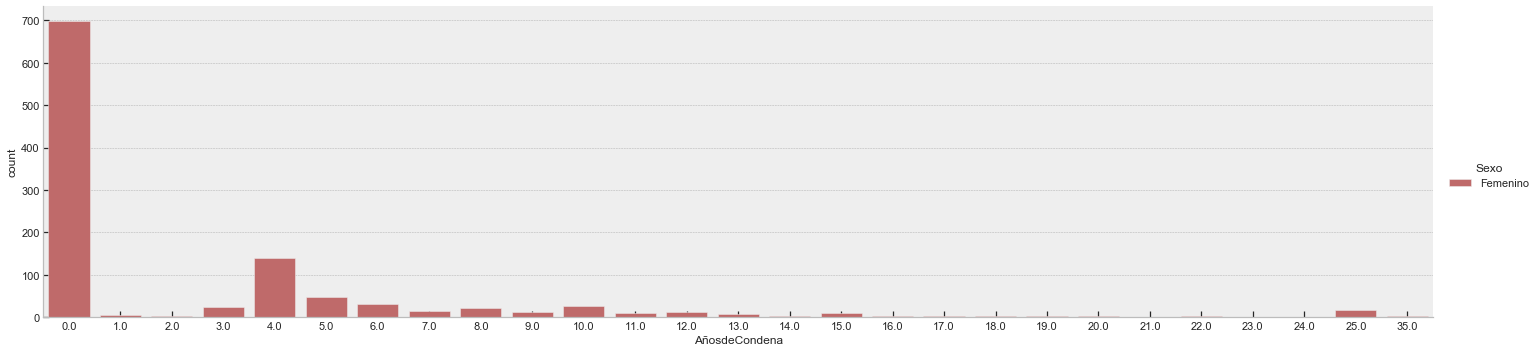

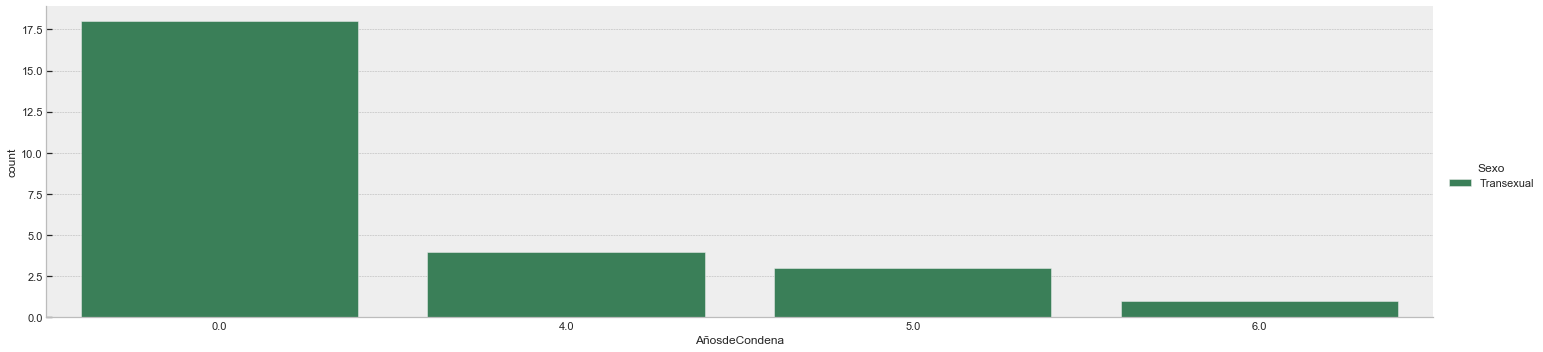

In [13]:
gr_4 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_5 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'],kind="count", aspect=4, palette=pal, legend_out=True)
gr_6 = sns.factorplot(x="AñosdeCondena",  hue="Sexo",
                      data=df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'],kind="count", aspect=4, palette=pal, legend_out=True)


* De este análisis vemos que la moda para los tres generos va ser la misma y que las condenas mas largas se dan en el genero masculino
* Haciendo el calculo de media, mediana, moda y desviación en cuanto a la edad por sexo nos da lo siguiente:

In [14]:
media = [df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mean(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mean(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mean()]
mediana=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.median(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.median(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.median()]
mode=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mode().values[0], df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mode().values[0],df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mode().values[0]]
std=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.std(), df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.std(),df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.std()]
d = {'Media': media,'Mediana': mediana,'Moda': mode,'Desviacion estandar': std }
df = pd.DataFrame(data=d, index=['Masculino','Femenino','Transexual'])
df

,Media,Mediana,Moda,Desviacion estandar
Masculino,3.704356,0.0,0.0,5.523137
Femenino,2.904036,0.0,0.0,5.200360
Transexual,1.423077,0.0,0.0,2.212204


#### Podemos concluir que predomina el genero masculino en la población, y cuando vemos la cantidad de años de condena por genero no existe gran diferencia en los años de encuesta 2015 y 2016.

## Calculos de Probabilidad  Conjunta y Marginal 

Cuando se está interesado en conocer la probabilidad de que dos sucesos se verifiquen simultáneamente, se habla de probabilidad conjunta. La distribución marginal está compuesta por el conjunto de probabilidades simples de los sucesos asociados a cada variable.

#### Para el calculo de la probabilidad marginal y conjunta se usarán los datos de las columnas participacion_programa_educativo_descripcion y es_reincidente_descripcion y poder hacer los análisis correspondientes.

In [15]:
df_nvo_datos = pd.DataFrame({
   'Prog_Educativo' : sneep.participacion_programa_educativo_descripcion,
   'Reincidente' : sneep.es_reincidente_descripcion,
}) 
Total_PEdu= sneep['participacion_programa_educativo_descripcion'].isnull()
Total_PEdu=Total_PEdu.value_counts()
Total_PEdu= Total_PEdu.sort_index()
Total_PEdu=Total_PEdu.sum()

tabla_1=df_nvo_datos[(df_nvo_datos['Prog_Educativo']  != 'No participa de ningún programa educativo')]
Existe_PEdu=tabla_1.Prog_Educativo.value_counts()
Existe_PEdu=Existe_PEdu.sum()
P_A=Existe_PEdu/Total_PEdu
print("La probabilidad de que tenga alguna participación en un programa educativo es P(A)= {}".format(P_A)   
)

La probabilidad de que tenga alguna participación en un programa educativo es P(A)= 0.44233687405159333


#### Se hace la tabla de distribución de frecuencias de la cantidad que participa en un programa educativo.

In [16]:
datos_pgedu= tabla_1.Prog_Educativo.value_counts()
lista_evento = datos_pgedu.sort_index()
total_eventos= lista_evento.sum()
df_Prg_Edu = pd.DataFrame({
   'Prog_Educativo' : lista_evento.index.values,
   'Frecuencia' : lista_evento.get_values(),
}) 
df_Prg_Edu['Frec_Prob'] = df_Prg_Edu['Frecuencia']/total_eventos
df_Prg_Edu = df_Prg_Edu[['Prog_Educativo', 'Frecuencia', 'Frec_Prob']]
df_Prg_Edu

,Prog_Educativo,Frecuencia,Frec_Prob
0,Si - educación formal - PRIMARIA (EGB),5336,0.397942
1,Si - educación formal - SECUNDARIA (Polimodal),5139,0.383250
2,Si - educación formal - TERCIARIA,327,0.024387
3,Si - educación formal - UNIVERSITARIA,483,0.036021
4,Si - educación no formal (Cursos),2124,0.158401


#### Con este análisis simple de si tiene participación en algun programa eductivo concluimos el que 50% tiene algun programa y que a medida que aumenta la formación disminuye la probabilidad de cometer un delito.

### Analizamos a continuación como se comporta que tenga programa educativo  y que sea un reincidente

* Para analizar de estas dos variables la probabilidad conjunta utilizaremos la siguiente formula
$$P (N \wedge     M)$$
* En el punto anterior se armo una tabla donde se quito de los datos de programa eductativo los NaN y los que no participan. Ahora se arma en base a esos datos la reincidencia.

In [17]:
con_progedu_reincidente = tabla_1.dropna(subset=['Reincidente'])
con_progedu_reincidente.shape

(5194, 2)

* Para calcular la probabilidad, dividimos por el total de casos

In [18]:
prob_progedu_rein = len(con_progedu_reincidente) / float(len(sneep))
print('P(M & N) = {}'.format(prob_progedu_rein))

P(M & N) = 0.17133997492907568


La probabilidad condicional es calculada como:

In [19]:
prob_progedu_dado_reincidencia = prob_progedu_rein / P_A
print('P(N | M) = {}'.format(prob_progedu_dado_reincidencia))

P(N | M) = 0.3873517786561265


Para poder hace un mejor analisis y ver si las variables son o no indepencientes primeros analizamos la distribución que se presenta en ambas

In [20]:
tabla_comb= pd.crosstab(index=tabla_1.Prog_Educativo.sort_index(), 
            columns=tabla_1.Reincidente.sort_index())
tabla_comb

Reincidente,Primario,Reincidencia múltiple (art. 52 CP),Reincidente (art. 50 CP),Reiterante
Prog_Educativo,,,,
Si - educación formal - PRIMARIA (EGB),1409,9,314,157
Si - educación formal - SECUNDARIA (Polimodal),1487,9,352,76
Si - educación formal - TERCIARIA,84,0,40,5
Si - educación formal - UNIVERSITARIA,137,0,46,13
Si - educación no formal (Cursos),483,2,120,38


* Para saber si los eventos son independientes podemos determinar si el producto de las probabilidades marginales es igual a la probabilidad conjunta
$$P(M) * P(N) = P(N \wedge     M)$$
* Calculamos P(N) que es la probabilidad de q exista reincidencia.

In [21]:
es_reincidente = sneep.dropna(subset=['es_reincidente_descripcion'])
es_reincidente.shape

(9965, 85)

In [22]:
prob_reincidencia= len(es_reincidente) / float(len(sneep))
prob_reincidencia

0.3287260011875701

In [23]:
print('Producto de probabilidades marginales P(N)*P(M): {}'.format(P_A * prob_reincidencia))
print('Probabilidad conjunta P(N & M): {}'.format(prob_progedu_dado_reincidencia))

Producto de probabilidades marginales P(N)*P(M): 0.14540763178479013
Probabilidad conjunta P(N & M): 0.3873517786561265


#### Con esto concluimos que son son variables independientes y que el hecho de que una persona participe en programas educativo primero tiene un 50% de probabilidad de cometer un delito y a medida que abanza en el nivel educativo disminuye la probabilidad de reincindir.